In [1]:
import torch
X = torch.Tensor([
                  [[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,0,0,0,0],[1,1,1,1,1]],
                  [[1,1,1,1,1],[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[1,1,1,1,1]],
                  [[1,0,0,0,1],[1,0,0,0,1],[1,0,0,0,1],[0,1,0,1,0],[0,0,1,0,0]],
                  [[1,1,1,1,1],[1,0,0,0,0],[1,1,1,1,1],[1,0,0,0,0],[1,1,1,1,1]],
])

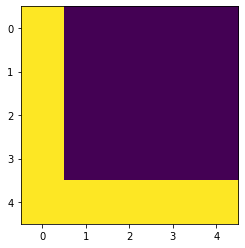

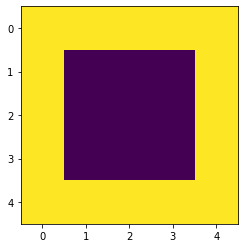

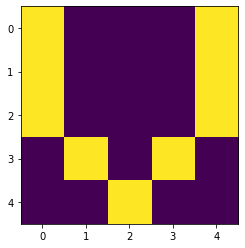

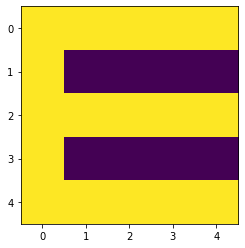

In [5]:
import matplotlib.pyplot as plt

for i in range(4):
    plt.imshow(X[i])
    plt.show()


In [17]:
y = torch.tensor([0, 1, 2, 3])
y

tensor([0, 1, 2, 3])

In [8]:
classes = {
    0: 'L',
    1: 'O',
    2: 'V',
    3: 'E',
}

## DEfine Model

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(25, 32)    # 32 is the hidden layer's dim
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 4)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:
net = FCNN()

In [11]:
net(X.view(-1, 25))

tensor([[-0.0022,  0.1073, -0.0780,  0.1120],
        [-0.0696,  0.1706, -0.1123,  0.1098],
        [-0.0351,  0.1092, -0.0502,  0.1237],
        [-0.0441,  0.2111, -0.1036,  0.0748]], grad_fn=<AddmmBackward0>)

## Train Model

In [12]:
loss_fn = nn.CrossEntropyLoss()

In [14]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.01)

epochs = 100

In [18]:
losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(X.view(-1, 25))
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()
    losses.append(loss)


In [29]:
t = torch.Tensor([1])
print(t)
print(type(t))
print(type(t[0]))
print(t[0].type)
t = torch.Tensor([1])
print(t.type)

tensor([1.])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<built-in method type of Tensor object at 0x7f6c4689ed70>
<built-in method type of Tensor object at 0x7f6c4689ed70>


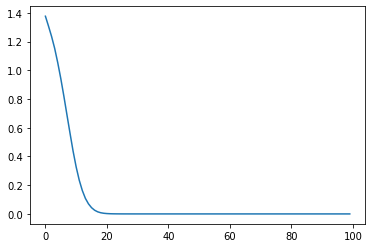

In [30]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()